# **Task 1 - Analysis on ML Test Scores**

In [25]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Load Dataset
df = pd.read_csv("scores_data.csv")

In [27]:
# Basic Data Check
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [29]:
df.describe()

,Batch,User_ID,Score
count,149,149,149
unique,3,149,8
top,AI_ELITE_7,uid_149,4 / 7
freq,53,1,40


In [30]:
# Check Missing Values
df.isnull().sum()

,0
Batch,0
User_ID,0
Score,0


In [31]:
df.columns = df.columns.str.strip()
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [32]:
df['Score'] = df['Score'].astype(str)
df['Score'] = df['Score'].str.extract(r'(\d+)')
df['Score'] = pd.to_numeric(df['Score'])

In [33]:
df['Batch'] = df['Batch'].astype(str).str.strip()

In [35]:
df = df.dropna(subset=['Score'])

In [36]:
# Students Count per Batch
df['Batch'].value_counts()

,count
Batch,
AI_ELITE_7,53
AI_ELITE_6,48
AI_ELITE_4,48


In [37]:
# Batch-wise Statistical Summary
batch_summary = df.groupby("Batch")["Score"].agg(
    Count="count",
    Mean="mean",
    Median="median",
    Min="min",
    Max="max",
    Std="std"
)

batch_summary.round(2)

,Count,Mean,Median,Min,Max,Std
Batch,,,,,,
AI_ELITE_4,48,3.79,4.0,0,7,1.44
AI_ELITE_6,48,4.23,4.0,0,7,1.64
AI_ELITE_7,53,5.06,5.0,2,7,1.45


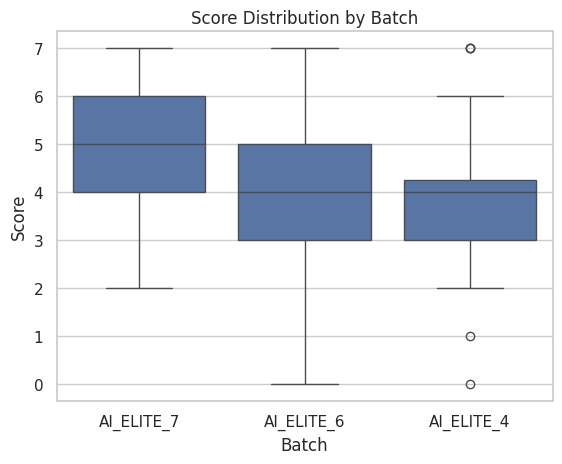

In [38]:
# Boxplot – Score Distribution by Batch
plt.figure()
sns.boxplot(x="Batch", y="Score", data=df)
plt.title("Score Distribution by Batch")
plt.show()

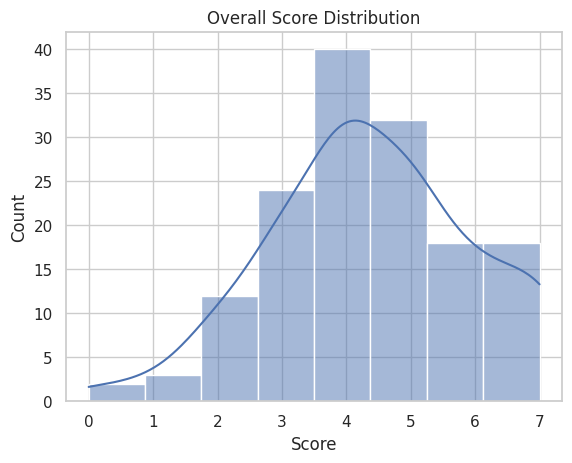

In [39]:
# Histogram – Overall Score Distribution
plt.figure()
sns.histplot(df["Score"], bins=8, kde=True)
plt.title("Overall Score Distribution")
plt.show()

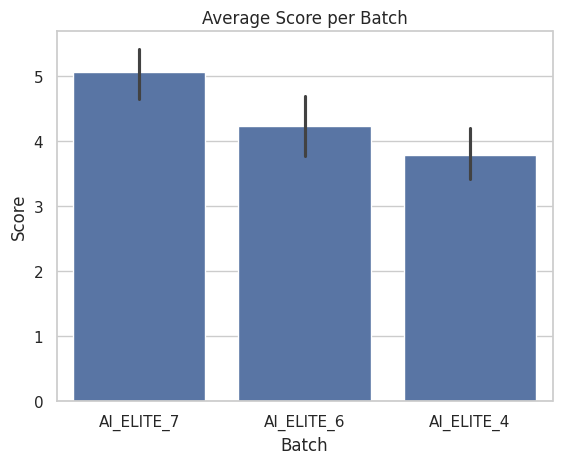

In [40]:
# Average Score per Batch
plt.figure()
sns.barplot(x="Batch", y="Score", data=df, estimator=np.mean)
plt.title("Average Score per Batch")
plt.show()

In [41]:
# Best & Weakest Batch
best_batch = df.groupby("Batch")["Score"].mean().idxmax()
worst_batch = df.groupby("Batch")["Score"].mean().idxmin()

best_batch, worst_batch

('AI_ELITE_7', 'AI_ELITE_4')

In [42]:
# Outlier Percentage (IQR Method)
def outlier_percentage(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    outliers = series[(series < Q1 - 1.5*IQR) | (series > Q3 + 1.5*IQR)]
    return round(len(outliers) / len(series) * 100, 2)

df.groupby("Batch")["Score"].apply(outlier_percentage)

,Score
Batch,
AI_ELITE_4,10.42
AI_ELITE_6,0.00
AI_ELITE_7,0.00
